<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Feature-:-bedroom" data-toc-modified-id="Feature-:-bedroom-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature : bedroom</a></span><ul class="toc-item"><li><span><a href="#Hypothesis" data-toc-modified-id="Hypothesis-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Hypothesis</a></span></li><li><span><a href="#Indicator" data-toc-modified-id="Indicator-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Indicator</a></span></li><li><span><a href="#Conslusion" data-toc-modified-id="Conslusion-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Conslusion</a></span></li></ul></li><li><span><a href="#Feature-Latitude-and-Longitude" data-toc-modified-id="Feature-Latitude-and-Longitude-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Feature Latitude and Longitude</a></span></li><li><span><a href="#Price-Distribution" data-toc-modified-id="Price-Distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Price Distribution</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Null-Value" data-toc-modified-id="Null-Value-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Null Value</a></span></li><li><span><a href="#Feature:-bedroom-number" data-toc-modified-id="Feature:-bedroom-number-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Feature: bedroom number</a></span></li><li><span><a href="#Feature:-Bedroom-number,-location" data-toc-modified-id="Feature:-Bedroom-number,-location-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Feature: Bedroom number, location</a></span></li><li><span><a href="#Feature-:-bedroom,-location,-lat-/-long" data-toc-modified-id="Feature-:-bedroom,-location,-lat-/-long-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Feature : bedroom, location, lat / long</a></span></li><li><span><a href="#Feature-Bedroom,-keywords" data-toc-modified-id="Feature-Bedroom,-keywords-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Feature Bedroom, keywords</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Lasso-Linear" data-toc-modified-id="Lasso-Linear-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lasso Linear</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#Poly-Regression" data-toc-modified-id="Poly-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Poly Regression</a></span></li><li><span><a href="#Lasso-Linear" data-toc-modified-id="Lasso-Linear-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Lasso Linear</a></span></li></ul></li></ul></div>

In [581]:
import os

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

import reverse_geocoder as rg
%matplotlib notebook

### Load Data

In [582]:
def get_file_api(file_name):
    return os.path.join('..', 'API', 'data', file_name)

def load_data_api(file_name):
    file_path = get_file_api(file_name)
    return pd.read_csv(file_path)

In [583]:
get_file_api('house_sell_nestoria.csv')

'..\\API\\data\\house_sell_nestoria.csv'

In [584]:
df_real_estate = load_data_api('house_sell_nestoria.csv')

### EDA

In [585]:
df_real_estate.shape

(1500, 28)

In [586]:
df_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 28 columns):
country                1500 non-null object
location               1500 non-null object
page                   1500 non-null int64
product_type           1500 non-null object
sort                   1500 non-null object
created_unix           1500 non-null int64
title                  1500 non-null object
property_type          1500 non-null object
lister_name            972 non-null object
listing_type           1500 non-null object
price                  1499 non-null float64
price_currency         1500 non-null object
price_high             1499 non-null float64
price_low              1499 non-null float64
price_type             1499 non-null object
commission             1500 non-null int64
latitude               1500 non-null float64
longitude              1500 non-null float64
location_accuracy      1500 non-null int64
construction_year      1500 non-null int64
keywords      

In [587]:
df_real_estate['property_type'].value_counts()

house       1209
flat         168
land          81
property      42
Name: property_type, dtype: int64

In [588]:
df_real_estate['product_type'].value_counts()

realestate    1500
Name: product_type, dtype: int64

In [589]:
df_real_estate['bedroom_number'].value_counts().shape

(14,)

In [590]:
df_real_estate[df_real_estate['property_type'] == 'property'].head(3)

,country,location,page,product_type,sort,created_unix,title,property_type,lister_name,listing_type,...,location_accuracy,construction_year,keywords,bathroom_number,bedroom_number,car_spaces,summary,updated_in_days,dt,latitude_longtitude
43,uk,somerset,3,realestate,nestoria_rank,1560829513,"Banwell, North Somerset",property,David James,buy,...,9,0,NaN,NaN,0.0,0,An opportunity to purchase a self-contained 1....,2,2019-06-18 03:45:13,"{'latitude': 51.3421, 'longitude': -2.86944}"
207,uk,somerset,14,realestate,nestoria_rank,1560829527,"Aisholt, Bridgwater, Somerset, TA5",property,NaN,buy,...,9,0,NaN,NaN,6.0,0,"A superb country property, ly restored and ext...",24,2019-06-18 03:45:27,"{'latitude': 51.1132, 'longitude': -3.15234}"
223,uk,somerset,15,realestate,nestoria_rank,1560829528,"Carlton Court, Wells, Somerset, BA5",property,Greenslade Taylor Hunt,buy,...,9,0,"Garden, No Chain, Kitchen, Reception",NaN,2.0,0,A two bedroom ground floor retirement apartmen...,6,2019-06-18 03:45:28,"{'latitude': 51.2084, 'longitude': -2.64429}"


In [591]:
df_real_estate[df_real_estate['property_type'] == 'house'].head(3)

,country,location,page,product_type,sort,created_unix,title,property_type,lister_name,listing_type,...,location_accuracy,construction_year,keywords,bathroom_number,bedroom_number,car_spaces,summary,updated_in_days,dt,latitude_longtitude
0,uk,somerset,1,realestate,nestoria_rank,1560829510,"Queen Square, North Curry, Taunton, Somerset, TA3",house,Stags,buy,...,9,0,"Detached, Garden, No Chain, Double Bedroom, Pa...",NaN,3.0,0,A most village house situated in a conservatio...,2,2019-06-18 03:45:10,"{'latitude': 51.0228, 'longitude': -2.97205}"
1,uk,somerset,1,realestate,nestoria_rank,1560829510,"Farriers Green, Monkton Heathfield, Taunton, S...",house,NaN,buy,...,9,0,"Detached, No Chain, Modern, Gas Central Heating",NaN,3.0,0,Positioned within a highly sought-after develo...,3,2019-06-18 03:45:10,"{'latitude': 51.0328, 'longitude': -3.06172}"
2,uk,somerset,1,realestate,nestoria_rank,1560829510,"Manor Farm, Forton, Chard, Somerset, TA20",house,Greenslade Taylor Hunt,buy,...,9,0,"Detached, Freehold, Grade II, Conversion, Listed",NaN,5.0,0,A contemporary conversion of this grade ii lis...,1,2019-06-18 03:45:10,"{'latitude': 50.8586, 'longitude': -2.94579}"


In [592]:
df_real_estate[df_real_estate['property_type'] == 'flat'].head(3)

,country,location,page,product_type,sort,created_unix,title,property_type,lister_name,listing_type,...,location_accuracy,construction_year,keywords,bathroom_number,bedroom_number,car_spaces,summary,updated_in_days,dt,latitude_longtitude
3,uk,somerset,1,realestate,nestoria_rank,1560829510,"Vivary Gate, Upper High Street, Taunton, Somer...",flat,Greenslade Taylor Hunt,buy,...,9,0,NaN,NaN,2.0,0,A top floor 2 bedroom flat situated within thi...,2,2019-06-18 03:45:10,"{'latitude': 51.0117, 'longitude': -3.10403}"
10,uk,somerset,1,realestate,nestoria_rank,1560829510,"Quantock Crt, Sth.Esplanade, Burnham-on-Sea, S...",flat,NaN,buy,...,9,0,"Penthouse, Purpose Built",NaN,3.0,0,A purpose built penthouse apartment standing t...,2,2019-06-18 03:45:10,"{'latitude': 51.2306, 'longitude': -3.00068}"
14,uk,somerset,1,realestate,nestoria_rank,1560829510,"Leach Road, Chard, Somerset, TA20",flat,Greenslade Taylor Hunt,buy,...,9,0,"Conversion, Parking",NaN,2.0,0,"Prices starting from £134,950 for a 2 bedroom ...",2,2019-06-18 03:45:10,"{'latitude': 50.8849, 'longitude': -2.95255}"


#### Feature : bedroom

##### Hypothesis
- More bedroom, higher price

##### Indicator
- The lowest price is increasing with the number of bedroom <br>
- The highest price centralize between 5 bedrooms and 8 bedrooms.

##### Conslusion
- Basically, the price increases with the number of bedroom, while other factors influence the price of house (might be the location)
- The number of bedroom can be used to set the base price of house

In [593]:
df_home = df_real_estate[(df_real_estate['property_type'] == 'house') | (df_real_estate['property_type'] == 'flat')]

<IPython.core.display.Javascript object>


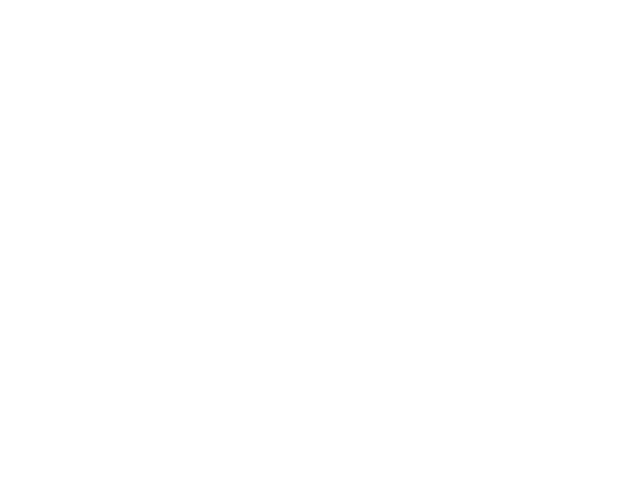

<IPython.core.display.Javascript object>


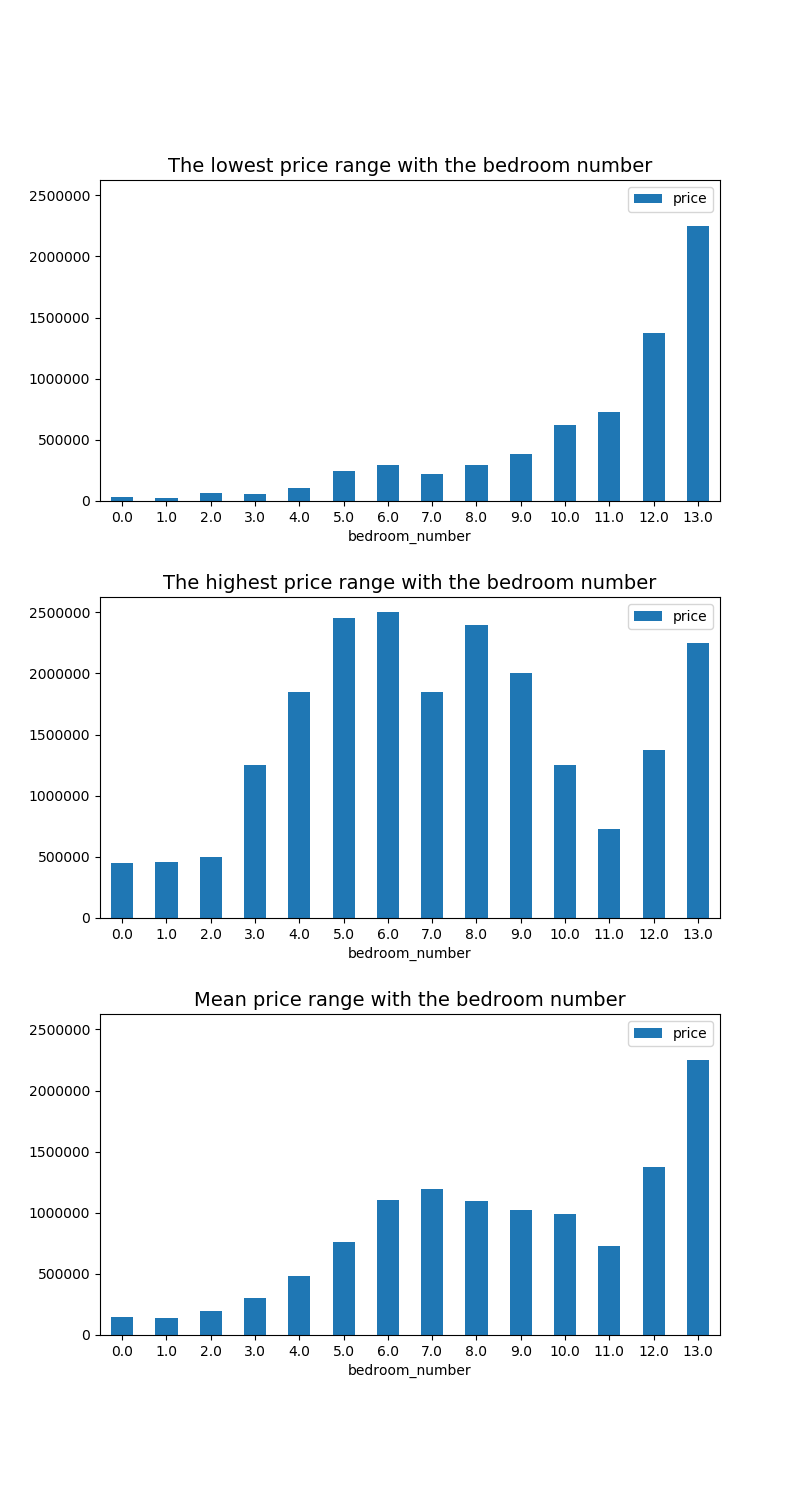

Text(0.5, 1.0, 'Mean price range with the bedroom number')

In [594]:
plt.figure()
fig, ax = plt.subplots(3, figsize= (8, 15), sharey= True)
fig.subplots_adjust(hspace= 0.3)
df_home.groupby('bedroom_number').agg('min')[['price']].plot.bar(ax= ax[0], rot= 0)
df_home.groupby('bedroom_number').agg('max')[['price']].plot.bar(ax= ax[1], rot= 0)
df_home.groupby('bedroom_number').agg('mean')[['price']].plot.bar(ax= ax[2], rot= 0)

ax[0].set_title('The lowest price range with the bedroom number', fontsize= 14)
ax[1].set_title('The highest price range with the bedroom number', fontsize= 14)
ax[2].set_title('Mean price range with the bedroom number', fontsize= 14)

In [595]:
df_home[df_home['bedroom_number'] == 11][['title', 'price', 'keywords', 'bedroom_number', 'bathroom_number']]

,title,price,keywords,bedroom_number,bathroom_number
980,"St Michaels Road, Minehead, Somerset, TA24",725000.0,"Detached, Edwardian",11.0,NaN


In [596]:
df_home[df_home['bedroom_number'] == 10][['title', 'price', 'keywords', 
                                          'bedroom_number', 'bathroom_number', 'car_spaces']]

,title,price,keywords,bedroom_number,bathroom_number,car_spaces
58,"Langaller, Taunton, Somerset, TA2",1250000.0,"Detached, Freehold, Garden, En suite, Grade II...",10.0,NaN,0
696,"Upper Church Road, Weston-Super-Mare, North So...",620000.0,Terraced,10.0,NaN,0
901,"Thorney, Langport, Somerset, TA10",1100000.0,"Detached, Garden, Cottage",10.0,NaN,0


In [597]:
df_home[df_home['bedroom_number'] == 9][['title', 'price', 'keywords', 
                                          'bedroom_number', 'bathroom_number', 'car_spaces']]

,title,price,keywords,bedroom_number,bathroom_number,car_spaces
33,"Over Stowey, Bridgwater, Somerset, TA5",2000000.0,"Detached, Garden, En suite, Garage, Kitchen, S...",9.0,NaN,0
1180,"Hurst, Martock, Somerset, TA12",695000.0,"Garden, Semi-Detached, En suite, Double Garage...",9.0,5.0,0
1268,"Locking Road, Weston-super-mare, Somerset, BS23",380000.0,"Garden, Semi-Detached, En suite, Wood Floor, K...",9.0,NaN,0


#### Feature Latitude and Longitude

In [598]:
df_home.columns

Index(['country', 'location', 'page', 'product_type', 'sort', 'created_unix',
       'title', 'property_type', 'lister_name', 'listing_type', 'price',
       'price_currency', 'price_high', 'price_low', 'price_type', 'commission',
       'latitude', 'longitude', 'location_accuracy', 'construction_year',
       'keywords', 'bathroom_number', 'bedroom_number', 'car_spaces',
       'summary', 'updated_in_days', 'dt', 'latitude_longtitude'],
      dtype='object')

In [64]:
df_home[['latitude', 'longitude']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 1499
Data columns (total 2 columns):
latitude     1373 non-null float64
longitude    1373 non-null float64
dtypes: float64(2)
memory usage: 32.2 KB


#### Price Distribution

<IPython.core.display.Javascript object>


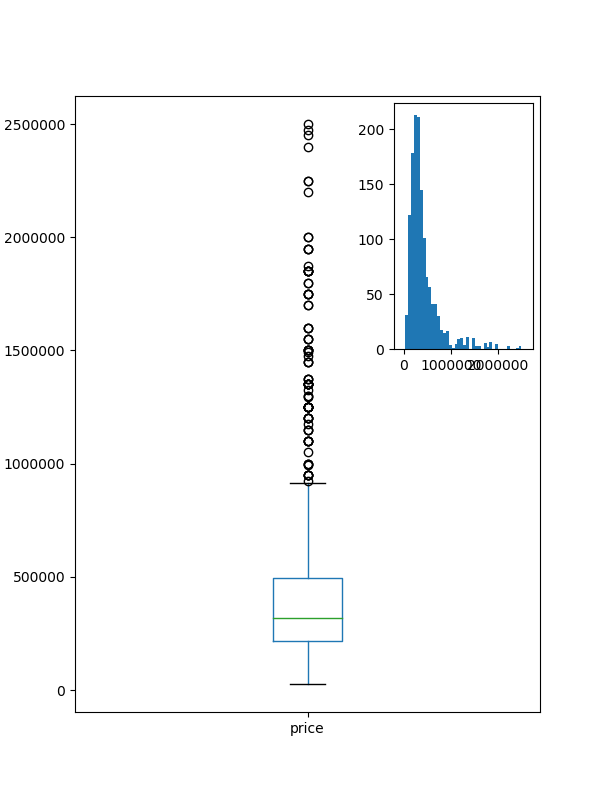

In [661]:
plt.figure()
ax = df_home['price'].plot.box(figsize= (6, 8))

ax_insert = mpl_il.inset_axes(ax, width= '30%', height= '40%', loc= 1)
ax_insert.hist(df_home['price'], bins= 40)
ax_insert.margins(x= 0.1)

### Preprocessing

In [600]:
# Only use house or flat type houses
df_home = df_real_estate[(df_real_estate['property_type'] == 'house') | (df_real_estate['property_type'] == 'flat')]

#### Null Value

In [601]:
# Firstly, drop all houses data with no bedroom info
df_home = df_home.dropna(subset=['bedroom_number'])

In [602]:
def get_train_test_data(df_train, target, cols):
    # Extract features
    df_train_new = pd.DataFrame(df_train[cols])
    return train_test_split(df_train_new, target, test_size= 0.3, random_state= 50)

#### Feature: bedroom number

In [603]:
cols_1 = np.array(['bedroom_number'])
X_train1, X_test1, Y_train1, Y_test1 = get_train_test_data(df_home, price, cols)

#### Feature: Bedroom number, location

In [604]:
df_home.index = range(len(df_home))

In [605]:
df_home['lat_long'] = list(zip(df_home['latitude'], df_home['longitude']))
rg_result = rg.search(df_home['lat_long'].tolist())
df_geo = json_normalize(rg_result)
df_home['area'] = df_geo['name']
df_home['location'] = df_geo['admin2']

In [606]:
df_home['location'].value_counts()

Somerset                        1127
North Somerset                   161
Bath and North East Somerset      48
Devon                             28
Dorset                             8
Vale of Glamorgan                  1
Name: location, dtype: int64

In [607]:
location_cols = pd.get_dummies(df_home['location']).columns

In [608]:
df_home = pd.concat([df_home, pd.get_dummies(df_home['location'])], axis=1)

In [609]:
df_home.shape

(1373, 36)

In [610]:
df_home.groupby(['location']).agg('min')['price'].plot.bar()

In [611]:
le = preprocessing.LabelEncoder()
df_home['location_num'] = df_home[['location']].apply(le.fit_transform)['location']

In [612]:
df_home.groupby('location').agg('mean').sort_values(by='price')

,page,created_unix,price,price_high,price_low,commission,latitude,longitude,location_accuracy,construction_year,...,bedroom_number,car_spaces,updated_in_days,Bath and North East Somerset,Devon,Dorset,North Somerset,Somerset,Vale of Glamorgan,location_num
location,,,,,,,,,,,,,,,,,,,,,
Dorset,76.625000,1.560830e+09,312368.750000,312368.750000,312368.750000,0.0,50.943675,-2.522002,9.000000,0.0,...,2.625000,0.0,17.250000,0,0,1,0,0,0,2
North Somerset,55.322981,1.560830e+09,326592.701863,326592.701863,326592.701863,0.0,51.344279,-2.928849,9.000000,0.0,...,3.062112,0.0,39.503106,0,0,0,1,0,0,3
Vale of Glamorgan,97.000000,1.560830e+09,365000.000000,365000.000000,365000.000000,0.0,51.384100,-3.339760,9.000000,0.0,...,4.000000,0.0,1.000000,0,0,0,0,0,1,5
Somerset,47.582076,1.560830e+09,420933.744454,420933.744454,420933.744454,0.0,51.073247,-2.926775,9.040816,0.0,...,3.424135,0.0,56.398403,0,0,0,0,1,0,4
Bath and North East Somerset,59.583333,1.560830e+09,500606.250000,500606.250000,500606.250000,0.0,51.317233,-2.479564,9.000000,0.0,...,3.312500,0.0,38.812500,1,0,0,0,0,0,0
Devon,80.142857,1.560830e+09,716785.714286,716785.714286,716785.714286,0.0,50.926311,-3.323753,9.000000,0.0,...,4.321429,0.0,93.678571,0,1,0,0,0,0,1


<IPython.core.display.Javascript object>


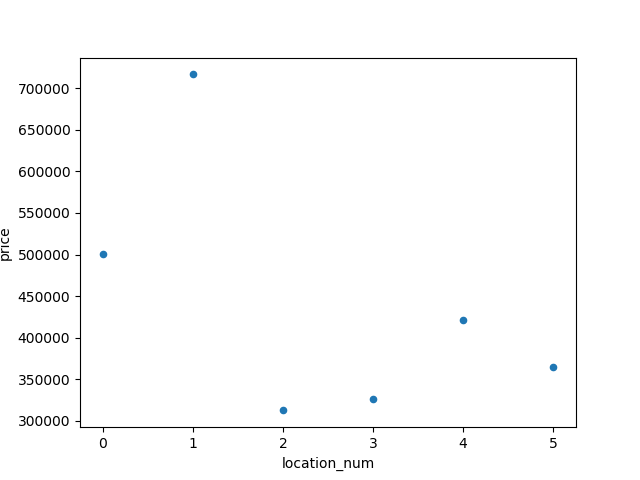

In [613]:
df_home.groupby('location').agg('mean').sort_values(by='price').plot.scatter(x= 'location_num', y= 'price')

In [345]:
cols_2 = np.append(np.array(['bedroom_number']), location_cols)
X_train2, X_test2, Y_train2, Y_test2 = get_train_test_data(df_home,
                                                           df_home['price'], 
                                                           cols_2)

#### Feature : bedroom, location, lat / long

In [614]:
df_home[['lat_long', 'area']].tail(2)

,lat_long,area
1371,"(51.1376, -3.00347)",Bridgwater
1372,"(50.9491, -2.80355)",South Petherton


In [615]:
df_somerset = pd.DataFrame(df_home[df_home['location'] == 'Somerset'])

In [616]:
le = preprocessing.LabelEncoder()
df_home['area_num'] = df_home[['area']].apply(le.fit_transform)['area']

<IPython.core.display.Javascript object>


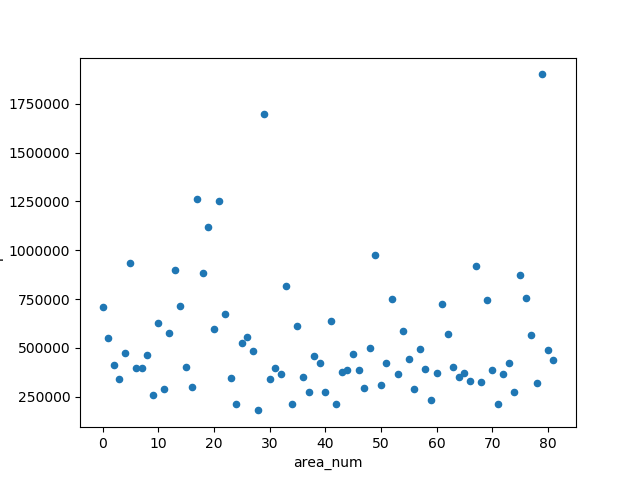

In [617]:
df_home.groupby('area').agg('mean').plot.scatter(x= 'area_num', y= 'price')

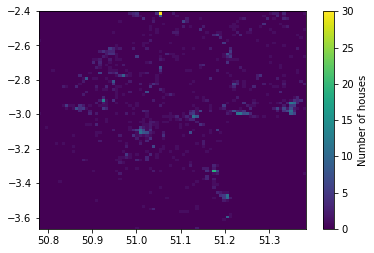

In [575]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
# fig, ax = plt.subplots(1)

# ax.set_title('hist test')
plt.hist2d(df_home['latitude'], df_home['longitude'], bins=80)
cb = plt.colorbar()
cb.set_label('Number of houses')

# fig.tight_layout()

plt.show()

In [618]:
df_somerset['area_num'] = df_somerset[['area']].apply(le.fit_transform)['area']

<IPython.core.display.Javascript object>


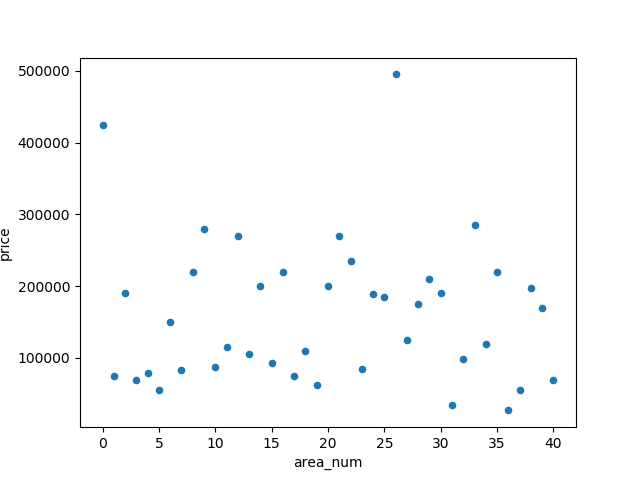

In [619]:
df_somerset.groupby('area').agg('min').plot.scatter(x= 'area_num', y= 'price')

In [392]:
somerset_area_columns = pd.get_dummies(df_somerset['area']).columns
len(somerset_area_columns)

41

In [620]:
# # Other places data is few, so only used data in Somerset
# df_home_somerset = pd.DataFrame(df_home[df_home['location'] == 'Somerset'])
# le = preprocessing.LabelEncoder()
# df_home_somerset['area_num'] = df_home_somerset[['area']].apply(le.fit_transform)['area']

In [621]:
df_somerset = pd.concat([df_somerset, pd.get_dummies(df_somerset['area'])], axis= 1)

In [622]:
df_somerset.shape

(1127, 79)

In [623]:
df_somerset.columns

Index(['country', 'location', 'page', 'product_type', 'sort', 'created_unix',
       'title', 'property_type', 'lister_name', 'listing_type', 'price',
       'price_currency', 'price_high', 'price_low', 'price_type', 'commission',
       'latitude', 'longitude', 'location_accuracy', 'construction_year',
       'keywords', 'bathroom_number', 'bedroom_number', 'car_spaces',
       'summary', 'updated_in_days', 'dt', 'latitude_longtitude', 'lat_long',
       'area', 'Bath and North East Somerset', 'Devon', 'Dorset',
       'North Somerset', 'Somerset', 'Vale of Glamorgan', 'location_num',
       'area_num', 'Axbridge', 'Bishops Lydeard', 'Bradley Cross',
       'Bridgwater', 'Bruton', 'Burnham-on-Sea', 'Castle Cary', 'Chard',
       'Cheddar', 'Chilcompton', 'Creech Saint Michael', 'Crewkerne',
       'Curry Rivel', 'Evercreech', 'Glastonbury', 'Highbridge', 'Ilchester',
       'Ilminster', 'Langport', 'Martock', 'Mendip', 'Merriott',
       'Milborne Port', 'Minehead', 'North Petherton',

In [624]:
cols_3 = np.append(['bedroom_number'], somerset_area_columns)
X_train3, X_test3, Y_train3, Y_test3 = get_train_test_data(df_somerset,
                                                           df_somerset['price'], 
                                                           cols_3)

In [625]:
X_train3.shape

(788, 42)

In [626]:
X_train3_scaled = preprocessing.MinMaxScaler().fit_transform(X_train3)
X_test3_scaled = preprocessing.MinMaxScaler().fit_transform(X_test3)

C:\Users\Yuan_Liao\AppData\Local\Continuum\anaconda3\envs\dsa\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Yuan_Liao\AppData\Local\Continuum\anaconda3\envs\dsa\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [627]:
# df_home_somerset[df_home_somerset['area_num'] == 31].plot.scatter(x= 'bedroom_number', y= 'price')

#### Feature Bedroom, keywords

In [628]:
df_home.columns

Index(['country', 'location', 'page', 'product_type', 'sort', 'created_unix',
       'title', 'property_type', 'lister_name', 'listing_type', 'price',
       'price_currency', 'price_high', 'price_low', 'price_type', 'commission',
       'latitude', 'longitude', 'location_accuracy', 'construction_year',
       'keywords', 'bathroom_number', 'bedroom_number', 'car_spaces',
       'summary', 'updated_in_days', 'dt', 'latitude_longtitude', 'lat_long',
       'area', 'Bath and North East Somerset', 'Devon', 'Dorset',
       'North Somerset', 'Somerset', 'Vale of Glamorgan', 'location_num',
       'area_num'],
      dtype='object')

In [629]:
df_home2 = pd.DataFrame(df_home)

In [630]:
df_home2 = df_home2.dropna(subset= ['keywords'])

In [631]:
X_train4, X_test4, Y_train4, Y_test4 = get_train_test_data(df_home2,
                                                           df_home2['price'], 
                                                           ['keywords'])

In [632]:
C_vectorizer = CountVectorizer()
testC_X = C_vectorizer.fit_transform(df_home2['keywords'])

In [633]:
len(C_vectorizer.get_feature_names())

76

In [634]:
T_vectorizer = TfidfVectorizer()
testT_X = T_vectorizer.fit_transform(df_home2['keywords'])

In [635]:
testT_X.shape

(1354, 76)

In [636]:
testT_X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [637]:
T_vectorizer.vocabulary_

{'detached': 18,
 'garden': 30,
 'no': 53,
 'chain': 12,
 'double': 20,
 'bedroom': 5,
 'parking': 57,
 'reception': 62,
 'modern': 49,
 'gas': 31,
 'central': 11,
 'heating': 36,
 'freehold': 27,
 'grade': 33,
 'ii': 39,
 'conversion': 14,
 'listed': 43,
 'garage': 29,
 'bungalow': 8,
 'new': 52,
 'build': 6,
 'conservatory': 13,
 'kitchen': 40,
 'victorian': 74,
 'semi': 66,
 'penthouse': 59,
 'purpose': 61,
 'built': 7,
 'cottage': 15,
 'terraced': 72,
 'fireplace': 25,
 'en': 22,
 'suite': 70,
 'refurbished': 63,
 'cul': 16,
 'de': 17,
 'sac': 64,
 'swimming': 71,
 'pool': 60,
 'georgian': 32,
 'leasehold': 41,
 'maisonette': 47,
 'balcony': 3,
 'needs': 51,
 'modernisation': 50,
 'basement': 4,
 'share': 67,
 'of': 54,
 'shared': 68,
 'ownership': 56,
 'off': 55,
 'street': 69,
 'patio': 58,
 'lift': 42,
 'cellar': 10,
 'accessibility': 0,
 'ex': 24,
 'local': 44,
 'auth': 2,
 'mews': 48,
 'high': 37,
 'ceilings': 9,
 'loft': 45,
 'furnished': 28,
 'edwardian': 21,
 'gym': 35,
 'w

In [638]:
keywords_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', Lasso()),
])

In [639]:
keywords_clf.fit(X_train4['keywords'], Y_train4)

C:\Users\Yuan_Liao\AppData\Local\Continuum\anaconda3\envs\dsa\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...e=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [640]:
keywords_clf.score(X_test4['keywords'], Y_test4)

0.4326614582152144

### Modeling

#### Linear Regression

In [641]:
df_home.columns

Index(['country', 'location', 'page', 'product_type', 'sort', 'created_unix',
       'title', 'property_type', 'lister_name', 'listing_type', 'price',
       'price_currency', 'price_high', 'price_low', 'price_type', 'commission',
       'latitude', 'longitude', 'location_accuracy', 'construction_year',
       'keywords', 'bathroom_number', 'bedroom_number', 'car_spaces',
       'summary', 'updated_in_days', 'dt', 'latitude_longtitude', 'lat_long',
       'area', 'Bath and North East Somerset', 'Devon', 'Dorset',
       'North Somerset', 'Somerset', 'Vale of Glamorgan', 'location_num',
       'area_num'],
      dtype='object')

In [642]:
def do_predict_LinearR(X_train, Y_train, X_test, Y_test, normalize= False):
    clf_LR = LinearRegression(normalize= normalize).fit(X_train, Y_train)
    print(f'score: {clf_LR.score(X_test, Y_test)}')
    return clf_LR, clf_LR.predict(X_test)

In [643]:
clf_LR1, y_pred1 = do_predict_LinearR(X_train1, Y_train1, X_test1, Y_test1, normalize= False)

score: 0.49831405858432404


<IPython.core.display.Javascript object>


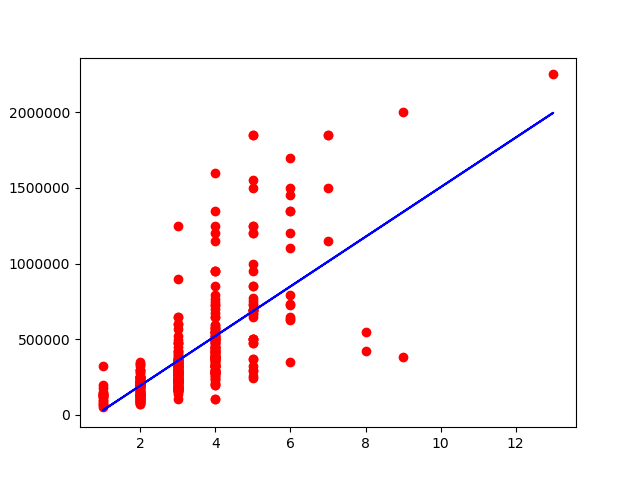

In [644]:
plt.figure()
plt.scatter(X_test1, Y_test1, color='red')
plt.plot(X_test1, clf_LR1.predict(X_test1),color='blue')


In [518]:
clf_LR2, y_pred2 = do_predict_LinearR(X_train2, Y_train2, 
                                      X_test2, Y_test2, normalize= False)

score: 0.5046668398204157


In [645]:
X_test2.head()

,bedroom_number,Bath and North East Somerset,Devon,Dorset,North Somerset,Somerset,Vale of Glamorgan
225,3.0,0,0,0,0,1,0
812,6.0,0,0,0,0,1,0
618,3.0,0,0,0,0,1,0
930,2.0,0,0,0,0,1,0
567,3.0,0,0,0,0,1,0


In [648]:
print(clf_LR2.intercept_)
print(clf_LR2.coef_)

-110936.36533622758
[ 162840.38311458   76816.65876918  146153.78024633   21625.31177114
  -45756.992693    -23413.59097156 -175425.16712209]


In [649]:
# Using Polynomial regression
poly = PolynomialFeatures(degree= 3)
X_train2_poly = poly.fit_transform(X_train2)
X_test2_poly = poly.fit_transform(X_test2)

clf_LR2_poly, y_pred2_poly = do_predict_LinearR(X_train2_poly, Y_train2,
                                 X_test2_poly, Y_test2, normalize= False)

score: 0.5434581257619646


In [650]:
LinearRegression?

In [651]:
clf_LR3, y_pred3 = do_predict_LinearR(X_train3_scaled, Y_train3, 
                                      X_test3_scaled, Y_test3, normalize= True)

score: -2.7545462184880953e+26


In [652]:
print(clf_LR3.intercept_)
print(clf_LR3.coef_)

-4.927106526081915e+19
[1.73252453e+06 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 2.91038305e-11 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19 4.92710653e+19 4.92710653e+19
 4.92710653e+19 4.92710653e+19]


In [653]:
list(zip(cols_3, clf_LR3.coef_))

[('bedroom_number', 1732524.5277337737),
 ('Axbridge', 4.927106526081914e+19),
 ('Bishops Lydeard', 4.927106526081904e+19),
 ('Bradley Cross', 4.927106526081894e+19),
 ('Bridgwater', 4.927106526081891e+19),
 ('Bruton', 4.9271065260819235e+19),
 ('Burnham-on-Sea', 4.927106526081891e+19),
 ('Castle Cary', 4.927106526081932e+19),
 ('Chard', 4.9271065260818964e+19),
 ('Cheddar', 4.9271065260819e+19),
 ('Chilcompton', 4.927106526081928e+19),
 ('Creech Saint Michael', 4.927106526081895e+19),
 ('Crewkerne', 4.927106526081901e+19),
 ('Curry Rivel', 4.927106526081892e+19),
 ('Evercreech', 4.927106526081905e+19),
 ('Glastonbury', 4.927106526081902e+19),
 ('Highbridge', 4.9271065260818964e+19),
 ('Ilchester', 4.927106526081902e+19),
 ('Ilminster', 4.9271065260818964e+19),
 ('Langport', 4.927106526081894e+19),
 ('Martock', 4.927106526081899e+19),
 ('Mendip', 2.9103830456733704e-11),
 ('Merriott', 4.9271065260819145e+19),
 ('Milborne Port', 4.927106526081894e+19),
 ('Minehead', 4.927106526081897e+1

In [654]:
# Using Polynomial regression
poly = PolynomialFeatures(degree= 2)
X_train3_poly = poly.fit_transform(X_train3)
X_test3_poly = poly.fit_transform(X_test3)

clf_LR3_poly, y_pred3_poly = do_predict_LinearR(X_train3_poly, Y_train3,
                                 X_test3_poly, Y_test3, normalize= False)

score: -2.0195278170093073e+23


#### Lasso Linear 

In [655]:
def do_predict_LassoLinear(X_train, Y_train, X_test, Y_test, alpha= 0.1, normalize= False):
    clf_LR = Lasso(alpha= alpha, normalize= normalize, max_iter= 5000).fit(X_train, Y_train)
    print(f'score: {clf_LR.score(X_test, Y_test)}')
    return clf_LR, clf_LR.predict(X_test)

In [656]:
clf_Lasso2, y_Lasso_pred2 = do_predict_LassoLinear(X_train2, Y_train2, 
                                          X_test2, Y_test2, alpha= 0.1, normalize= False)

score: 0.5046670732252092


In [657]:
clf_Lasso3, y_Lasso_pred3 = do_predict_LassoLinear(X_train3, Y_train3, 
                                          X_test3, Y_test3, alpha= 0.5, normalize= True)

score: 0.3549826193628657


In [429]:
Lasso?

### Evaluation

#### Linear Regression Model 

In [404]:
cross_val_score(clf_LR1, X_test1, Y_test1, cv=3)

array([0.58429563, 0.45352335, 0.44137518])

#### Poly Regression

In [405]:
cross_val_score(clf_LR2, X_test2, Y_test2, cv=3)

array([0.59180707, 0.4559577 , 0.42616759])

#### Lasso Linear

In [408]:
# print(confusion_matrix(Y_test1, y_pred1))
cross_val_score(clf_LR3, X_test3, Y_test3, cv=3)

array([-3.37829687e+22,  3.52662872e-01, -3.85020932e+20])

In [30]:
clf_LR1?